In [ ]:
# importation des bibliothèques necessaires 
import pandas as pd
from pandas_profiling import ProfileReport
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nm = pd.read_csv("/content/drive/MyDrive/challenge_1_data/nomenclature_produits.csv")
PdV = pd.read_csv("/content/drive/MyDrive/challenge_1_data/points_de_vente.csv")
PrV = pd.read_csv("/content/drive/MyDrive/challenge_1_data/prix_vente.csv")
V_18 = pd.read_csv("/content/drive/MyDrive/challenge_1_data/ventes_2018.csv")

In [ ]:
gc.collect() #nettoie la ram

88

In [ ]:
len(V_18["ID_ARTC"].unique()),len(PrV["ID_ARTC"].unique())

(2500, 2500)

##Pretraitement

In [ ]:
nm.head()


,ID_ARTC,LB_VENT_RAYN,LB_VENT_FAML,LB_VENT_SOUS_FAML
0,905,CREMERIE LS,ULTRA FRAIS,ULTRA FRAIS - SS-FAML 2
1,477,LIQUIDES,BOISSONS GAZEUSES ET PLATES,BOISSONS GAZEUSES ET PLATES - SS-FAML 6
2,863,LIQUIDES,BIERES ET CIDRES,BIERES ET CIDRES - SS-FAML 2
3,1741,EPICERIE SUCREE,CAFES / CHICOREE,CAFES / CHICOREE - SS-FAML 2
4,983,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 2


In [ ]:
PdV.head()

,ID_PDV,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP
0,1,VOC_1,RGN_1,NB_CAIS_G_1,SURF_G_1
1,10,VOC_1,RGN_4,NB_CAIS_G_1,SURF_G_2
2,100,VOC_4,RGN_7,NB_CAIS_G_4,SURF_G_3
3,101,VOC_4,RGN_7,NB_CAIS_G_2,SURF_G_3
4,102,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3


In [ ]:
PrV.head()

,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_UNITAIRE
0,44,968,2019,1,Entre 3 et 3.99€
1,44,639,2018,3,Entre 2 et 2.99€
2,44,574,2019,1,Moins de 0.99€
3,44,781,2018,3,Moins de 0.99€
4,44,543,2018,1,Entre 1 et 1.99€


In [ ]:
V_18.head()

,ID_PDV,ID_ARTC,DATE,QTE
0,102,398,2018-05-14,3
1,102,2273,2018-05-14,1
2,5,1345,2018-05-14,1
3,87,290,2018-05-14,9
4,118,7,2018-05-14,15


In [ ]:
nm.shape,PdV.shape,PrV.shape,V_18.shape

((2500, 4), (149, 5), (1185315, 5), (32793018, 4))

In [ ]:
V_18.head()

,ID_PDV,ID_ARTC,DATE,QTE
0,102,398,2018-05-14,3
1,102,2273,2018-05-14,1
2,5,1345,2018-05-14,1
3,87,290,2018-05-14,9
4,118,7,2018-05-14,15


In [ ]:

gc.collect() #nettoie la ram

88

In [ ]:
# je retire les Pdv 2019 et les point de vente

PrV_2018 = PrV[PrV['ANNEE'] == 2018]
PrV_2018 = PrV_2018.drop(['ID_PDV','TRIMESTRE','ANNEE'], axis = 1)

PrV_2018.head()
#Prv_2018['ANNEE'].unique()

,ID_ARTC,PRIX_UNITAIRE
1,639,Entre 2 et 2.99€
3,781,Moins de 0.99€
4,543,Entre 1 et 1.99€
5,399,Entre 2 et 2.99€
6,262,Entre 1 et 1.99€


In [ ]:
# gerer la colonne  PRIX_UNITAIRE
import re

def MoyenneCol(df,col) :
   M = []
   for i in df[col]:
     L = re.findall(r"(?:\d+)[.\d]*", i  )
     m = [float(i) for i in L] # convertir en float 
     M.append(np.sum(m)/2)
   return M

In [ ]:
PrV_2018['prix'] = MoyenneCol(PrV_2018,'PRIX_UNITAIRE')

In [ ]:
PrV_2018.drop('PRIX_UNITAIRE', axis = 1, inplace= True)


In [ ]:
PrV_2018.head()

,ID_ARTC,prix
1,639,2.495
3,781,0.495
4,543,1.495
5,399,2.495
6,262,1.495


In [ ]:
# ligne unique de ID_ARTC
PrV_2018.drop_duplicates('ID_ARTC', keep= 'first',inplace= True)


In [ ]:
gc.collect() #nettoie la ram

88

In [ ]:
df_final =  pd.merge(V_18,PdV, on = 'ID_PDV' , how ='outer' )
#df_final.head()
#df_final.shape

In [ ]:
# merge des 3 tables
df_final1 =  pd.merge(df_final,PrV_2018, on = 'ID_ARTC' , how ='outer' )
df_final1.head()

,ID_PDV,ID_ARTC,DATE,QTE,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,prix
0,102,398,2018-05-14,3,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
1,102,398,2018-08-13,11,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
2,102,398,2018-02-10,5,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
3,102,398,2018-05-02,7,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
4,102,398,2018-09-12,4,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495


In [ ]:
# encoder 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_final1['ID_VOCT'].unique())
le.transform(df_final1['ID_VOCT'].unique())

df_final1['ID_VOCT']= le.transform(df_final1['ID_VOCT'])



In [ ]:
VarCategori = []

In [ ]:
le.fit(df_final1['ID_VOCT'].unique())
le.transform(df_final1['ID_VOCT'].unique())

df_final1['ID_VOCT']= le.transform(df_final1['ID_VOCT'])


In [ ]:
df_final1.head()

,ID_PDV,ID_ARTC,DATE,QTE,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,prix
0,102,398,2018-05-14,3,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
1,102,398,2018-08-13,11,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
2,102,398,2018-02-10,5,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
3,102,398,2018-05-02,7,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495
4,102,398,2018-09-12,4,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495


In [ ]:
def preTraitement(df, colCategory, trainable=True):

  
   #Gestion de la date

  df['DATE'] = pd.to_datetime(df["DATE"])
  df['day'] = df.DATE.dt.day #création de la variable day
  df['month'] = df.DATE.dt.month #création de la variable month
  df['weekday'] = df.DATE.dt.weekday
  del df['DATE']

In [ ]:
preTraitement(df_final1, 'ID_PDV', trainable=True)

In [ ]:
df_final1.head()

,ID_PDV,ID_ARTC,QTE,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,prix,day,month,weekday
0,102,398,3,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495,14,5,0
1,102,398,11,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495,13,8,0
2,102,398,5,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495,10,2,5
3,102,398,7,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495,2,5,2
4,102,398,4,3,RGN_7,NB_CAIS_G_3,SURF_G_3,2.495,12,9,2


In [ ]:
# convertir les variables categorielle en numerique

Cat = ['ID_REGN','NB_CAIS_GRP','SURF_GRP']
def VarNumerique(df, Cat):
  for col in Cat :
    le.fit(df_final1[col].unique())
    le.transform(df_final1[col].unique())
    df_final1[col]= le.transform(df_final1[col])

  

In [ ]:
VarNumerique(df_final1, Cat)

In [ ]:
df_final1.head()

,ID_PDV,ID_ARTC,QTE,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,prix,day,month,weekday
0,102,398,3,3,6,2,2,2.495,14,5,0
1,102,398,11,3,6,2,2,2.495,13,8,0
2,102,398,5,3,6,2,2,2.495,10,2,5
3,102,398,7,3,6,2,2,2.495,2,5,2
4,102,398,4,3,6,2,2,2.495,12,9,2


In [ ]:
# matrice de correlation 

corr_df = df_final1.corr(method='pearson')

corr_df.style.background_gradient(cmap='coolwarm')

,ID_PDV,ID_ARTC,QTE,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP,prix,day,month,weekday
ID_PDV,1.000000,0.045479,0.022913,0.858281,0.382153,0.367652,0.491843,0.020883,0.000617,0.000126,-0.008214
ID_ARTC,0.045479,1.000000,-0.342120,0.061137,0.008978,0.107247,0.097954,0.184118,-0.002603,0.000570,0.006075
QTE,0.022913,-0.342120,1.000000,0.042252,-0.007976,0.094806,0.085501,-0.070923,0.001584,0.003805,0.019837
ID_VOCT,0.858281,0.061137,0.042252,1.000000,0.004408,0.505201,0.614911,0.025163,0.000311,-0.000142,-0.007134
ID_REGN,0.382153,0.008978,-0.007976,0.004408,1.000000,0.012910,0.034467,0.005366,-0.000021,0.001103,-0.004571
NB_CAIS_GRP,0.367652,0.107247,0.094806,0.505201,0.012910,1.000000,0.770855,0.034217,-0.000291,-0.000902,-0.011753
SURF_GRP,0.491843,0.097954,0.085501,0.614911,0.034467,0.770855,1.000000,0.038430,0.000071,0.000253,-0.009919
prix,0.020883,0.184118,-0.070923,0.025163,0.005366,0.034217,0.038430,1.000000,0.000856,0.013405,0.006177
day,0.000617,-0.002603,0.001584,0.000311,-0.000021,-0.000291,0.000071,0.000856,1.000000,-0.001799,-0.017591
month,0.000126,0.000570,0.003805,-0.000142,0.001103,-0.000902,0.000253,0.013405,-0.001799,1.000000,0.003387


In [ ]:
# ID_VOCT est corr plus ID_PDV  et un moins avec SURF_GR
# SURF_GRP est corr plus avec NB_CAIS_GRP et moins avec ID_VOCT

Train Set \ Test Set

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
num = ['ID_PDV','ID_ARTC','ID_VOCT','ID_REGN','NB_CAIS_GRP','SURF_GRP','prix','day','month','weekday']
tar = ['QTE']

In [ ]:
num

['ID_PDV',
 'ID_ARTC',
 'ID_VOCT',
 'ID_REGN',
 'NB_CAIS_GRP',
 'SURF_GRP',
 'prix',
 'day',
 'month',
 'weekday']

In [ ]:
X_train,X_test, y_train, y_test = train_test_split( num, tar, test_size = 0.2, random_state = 50 )

ValueError: ignored

In [ ]:
X_train.shape, X_test.shape, y_test.shape,y_train.shape

((26234414, 6), (6558604, 6), (6558604,), (26234414,))

## Model 1 Regresssion lineaire multiple

In [ ]:
from sklearn import linear_model

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation avec la metrique RMSLE

In [ ]:
from sklearn.metrics import mean_squared_log_error

In [ ]:
Y_pred = regr.predict(X_test)
Y_pred.shape

(6558604,)

In [ ]:
np.sqrt(mean_squared_log_error(y_test, Y_pred)) 

1.0852368529046342e-14

In [ ]:
np.sqrt(mean_squared_log_error(y_test, Y_pred))

1.0852368529046342e-14

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(linear_model.LinearRegression(),X_train,y_train, cv =5)

array([1., 1., 1., 1., 1.])

In [ ]:
gc.collect() #nettoie la ram

88

##  Table CSV pour la soumission

In [ ]:
def recD(x):
  l = x.split('-')
  return l[0] + l[1]+ l[2]
   
def IdSubmision(df_2019):
  recALL = lambda x: '{}_{}_{}'.format(x.ID_PDV,x.ID_ARTC,recD(x.DATE))

  return df_2019.apply(recALL, axis=1)


88

In [ ]:
l = np.concatenate((np.unique(nm[nm['LB_VENT_RAYN']=='FRUITS ET LEGUMES']['ID_ARTC']), np.unique(nm[nm['LB_VENT_RAYN']=='CREMERIE LS']['ID_ARTC'])))
df_clean = V_18[-V_18['ID_ARTC'].isin(l)]
df_clean = df_clean[-df_clean['QTE'].isin([0])]

# Visualisation

In [ ]:
profile = ProfileReport(df_clean)
profile.to_notebook_iframe()

In [ ]:
import gc
gc.collect() #nettoie la ram

88

In [ ]:
V_18.describe()

,ID_PDV,ID_ARTC,QTE
count,3.279302e+07,3.279302e+07,3.279302e+07
mean,8.081546e+01,8.528577e+02,3.759308e+00
std,4.123523e+01,6.359843e+02,6.151468e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.500000e+01,2.920000e+02,1.000000e+00
50%,8.300000e+01,7.380000e+02,2.000000e+00
75%,1.170000e+02,1.318000e+03,4.000000e+00
max,1.490000e+02,2.500000e+03,1.922000e+03


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Example of normal dist')

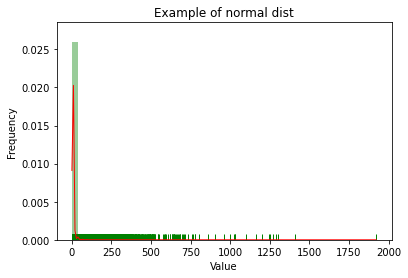

In [ ]:
sns.distplot(df_clean.QTE, color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Example of normal dist')


In [ ]:
df_clean['labelClass']= [1 if i==1 else 0 for i in df_clean['QTE']]

In [ ]:
df_clean

,ID_PDV,ID_ARTC,DATE,QTE,labelClass
1,102,2273,2018-05-14,1,1
2,5,1345,2018-05-14,1,1
5,39,225,2018-05-14,14,0
7,128,66,2018-05-14,12,0
8,140,20,2018-05-14,10,0
...,...,...,...,...,...
32793013,142,1100,2018-11-16,1,1
32793014,50,474,2018-11-16,1,1
32793015,35,1390,2018-11-16,1,1
32793016,59,1783,2018-11-16,1,1


In [ ]:
PrV.head()

,ID_PDV,ID_ARTC,ANNEE,TRIMESTRE,PRIX_UNITAIRE
0,44,968,2019,1,Entre 3 et 3.99€
1,44,639,2018,3,Entre 2 et 2.99€
2,44,574,2019,1,Moins de 0.99€
3,44,781,2018,3,Moins de 0.99€
4,44,543,2018,1,Entre 1 et 1.99€


In [ ]:
PdV.head()

,ID_PDV,ID_VOCT,ID_REGN,NB_CAIS_GRP,SURF_GRP
0,1,VOC_1,RGN_1,NB_CAIS_G_1,SURF_G_1
1,10,VOC_1,RGN_4,NB_CAIS_G_1,SURF_G_2
2,100,VOC_4,RGN_7,NB_CAIS_G_4,SURF_G_3
3,101,VOC_4,RGN_7,NB_CAIS_G_2,SURF_G_3
4,102,VOC_4,RGN_7,NB_CAIS_G_3,SURF_G_3


In [ ]:
nm.head()
#len(np.unique(nm.ID_ARTC))

,ID_ARTC,LB_VENT_RAYN,LB_VENT_FAML,LB_VENT_SOUS_FAML
0,905,CREMERIE LS,ULTRA FRAIS,ULTRA FRAIS - SS-FAML 2
1,477,LIQUIDES,BOISSONS GAZEUSES ET PLATES,BOISSONS GAZEUSES ET PLATES - SS-FAML 6
2,863,LIQUIDES,BIERES ET CIDRES,BIERES ET CIDRES - SS-FAML 2
3,1741,EPICERIE SUCREE,CAFES / CHICOREE,CAFES / CHICOREE - SS-FAML 2
4,983,CREMERIE LS,FROMAGE LS,FROMAGE LS - SS-FAML 2


In [ ]:
sns.distplot(V_18.QTE, color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})
pyplot.xlabel('Value')
pyplot.ylabel('Frequency')
pyplot.title('Example of normal dist')

In [ ]:
np.unique(nm.LB_VENT_RAYN)

array(['ALIMENTATION POUR ANIMAUX', 'BAZAR LEGER', 'BOUCHERIE LS',
       'CHARCUTERIE TRAITEUR LS', 'CREMERIE LS', 'D.P.H.',
       'EPICERIE SALEE', 'EPICERIE SUCREE', 'FRUITS ET LEGUMES',
       'LIQUIDES', 'PAIN PAT LS INDUS', 'SAURISSERIE', 'SURGELES',
       'VOLAILLE LS'], dtype=object)

422

In [ ]:
f = open('y_test_template.csv','w+')
#res=np.arange(594)
res=Z15
f.write("seqID;anomaly\n")
for num,Z15 in enumerate(res):
    f.write(str(num)+";" + str(Z15)+ "\n")
f.close()  

In [ ]:
plt.figure(figsize= (12,4))
plt.subplot(121)
plt.scatter(X_train[:,0],y_train[:,1], c = y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(120)
plt.scatter(X_test[:,0],y_test[:,1], c = y_test, alpha=0.8)
plt.title('Test set')

